# Growth Model

Social Planner's problem in per capita terms:

$$ \max \sum_{t=0}^{\infty }\beta ^{t} \frac{c_{t}^{1-\sigma}}{1-\sigma} $$
s.t.
$$c_{t}+ k_{t+1}=(1+g)^t k_{t}^{\alpha } 
+\left( 1-\delta \right) k_{t} $$
where 
\begin{eqnarray*}
l_{0} &=&1 \\
A_{0} &=&1
\end{eqnarray*}

Parameters: $\beta ,\sigma, g,\alpha ,$ $n$, and $\delta .$

We can make a change-in-variables to render stationary; i.e.
$$ \tilde c_t = c_t (1+g)^{-t}, \quad \tilde k_t = k_t (1+g)^{-t}, 
\quad \tilde \beta = \beta (1+g)^{1-\sigma} $$
In which case,
$$\tilde c_{t}+ \tilde k_{t+1}(1+g) = \tilde k_{t}^{\alpha } 
+\left( 1-\delta \right) \tilde k_{t} $$


The Euler condition is
$$ 
\left [ \tilde k_{t}^{\alpha } +( 1-\delta ) \tilde k_{t} -
(1+g) \tilde k_{t+1}\right ] ^{-\sigma} 
$$
$$
= \tilde \beta \left [ \tilde k_{t+1}^{\alpha } +( 1-\delta ) \tilde k_{t+1} - (1+g) \tilde k_{t+2}\right ] ^{-\sigma} 
\left [ \alpha \tilde k_{t+1}^{\alpha-1 } +( 1-\delta ) \right ]
$$

The steady state Euler condition is 
$$ 
1 = \tilde \beta \left [ \alpha k^{\alpha-1 } + ( 1-\delta ) \right ]
$$
So $$ k = \left [ \frac{ \tilde \beta^{-1} -(1-\delta) }{\alpha} \right ]
^{1/(\alpha - 1)}$$
Define the steady state savings fraction as 
$$ s := \frac{(1+g)k}{ k^{\alpha} + (1-\delta) k  } $$

We will be solving for the optimal "savings" function
$$ k_{+1} = G(Y(k)), \quad Y(k):= k^{\alpha} + (1-\delta) k $$

We will take the initial savings function to be $ G_{0}(Y) = sY/(1+g)$.

Given the savings function we can form the r.h.s of the Euler condition as 
$$ M(k|G) = \tilde \beta \left [ Y(k) - (1+g) G \left (  Y(k) \right ) \right ] ^{-\sigma} 
\left [ \alpha k^{\alpha-1 } +( 1-\delta ) \right ]
$$

We will be constucting an approximation of $M$ and using it to solve for the new savings function as follows. 

1. For each $k \in \mathbf{K}$ we can solve for $k'$ s.t.
$$ \left [ Y(k) - (1+g)k' \right ]^{-\sigma} = M(k'|G).$$ 


2. Then, we can use these results to form 
$$ k' = G_{+1} (Y(k)) $$.

3. Then we form the new rhs
$$ M_{+1}(k|G_{+1}) = \tilde \beta \left [ Y(k) - (1+g) G_{+1} \left (  Y(k) \right ) \right ] ^{-\sigma} 
\left [ \alpha k^{\alpha-1 } +( 1-\delta ) \right ]
$$

We iterate on this until we get convergence. Note that we are solving on a grid so we need to interpolate between grid points. 

In [1]:
import numpy as np
from scipy.interpolate import interp1d
import scipy.optimize as sc
%matplotlib inline
import matplotlib.pyplot as plt


# Parameters

β = 0.98

σ = 2

g = .02

α = .033

δ = 0.08

β_t = (1+g)**(1-σ) * β

# Steady State Values

k_ss = ( (β_t**(-1) - 1 + δ)/α )**(1/(α-1))

Y_ss = k_ss**α + (1-δ)*k_ss

s_ss = (1+g)*k_ss / Y_ss

# Capital Grid 

grid_size = 100

K_grid = np.linspace(.1*k_ss, 2*k_ss, grid_size)


In [2]:
# Key Functions

def Yfun(k):
    
    Y = k**α + (1-δ)*k
    
    return Y


def MU_RHS(k, K_array, G_array):
    """
    Right hand side of the Euler equation.
    """
    v = interp1d(K_array, G_array)
    
    c = Yfun(k) - (1+g)*v(k)
    
    MPK = α*k**(α-1) + (1-δ)

    return c**(-σ)*MPK

def Tfun(G_array, K_array):
    
    G_new = np.copy(G_array)
    
    for count in range(len(K_array)):
        
        k = K_array[count]
        
        def fun(k_new):
        
            gap = (Yfun(k) - (1+g)*k_new )**(-σ) - MU_RHS(k_new, K_array, G_array)
            
            return gap
        
        x = sc.fsolve(fun,0.2)
        
        G_new[count] = x
        
    Err = max(abs(G_new-G_array))
        
    return G_new, Err
        
        

In [3]:
# Loop on savings function

Solow_g = (s_ss/(1+g))*(K_grid**α + (1-δ)*K_grid)

G_old = (s_ss/(1+g))*(K_grid**α + (1-δ)*K_grid)

for counter in range(500):
    
    G_new, gap_new = Tfun(G_old,K_grid)
    
    if gap_new < .0001:
        
        print('success ',counter)
        
        break
        
    G_old = G_new

print(G_new, gap_new)



success  18
[0.12684723 0.13165533 0.13618193 0.14050357 0.14467064 0.14871807
 0.15267106 0.15654835 0.16036397 0.16412908 0.1678525  0.17154129
 0.17520134 0.17883718 0.1824527  0.18605131 0.18963596 0.19320873
 0.19677156 0.20032659 0.20387513 0.20741834 0.21095745 0.21449346
 0.21802703 0.221559   0.2250906  0.2286217  0.2321528  0.23568477
 0.23921791 0.24275231 0.24628844 0.24982677 0.25336723 0.25691006
 0.26045602 0.2640046  0.26755588 0.27111039 0.2746685  0.27822974
 0.28179415 0.28536239 0.28893401 0.29250907 0.29608811 0.2996709
 0.30325715 0.30684697 0.31044123 0.31403899 0.31764027 0.32124546
 0.32485469 0.3284676  0.33208418 0.33570496 0.33932926 0.34295713
 0.34658895 0.35022483 0.35386421 0.35750705 0.36115384 0.36480446
 0.36845857 0.3721161  0.37577765 0.37944265 0.38311105 0.38678309
 0.39045881 0.39413776 0.39781999 0.40150612 0.40519581 0.40888865
 0.41258459 0.41628406 0.41998691 0.4236929  0.427402   0.43111469
 0.43483039 0.43854913 0.44227107 0.44599642 0.4497

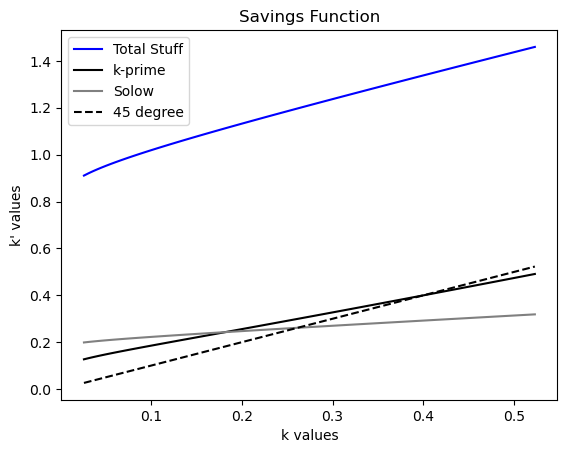

In [4]:
fig = plt.figure()
ax = plt.axes()

ax.plot(K_grid, Yfun(K_grid), color = 'blue', linestyle = 'solid');
ax.plot(K_grid,G_new, color = 'black', linestyle = 'solid');
ax.plot(K_grid,Solow_g, color = 'grey', linestyle = 'solid');
ax.plot(K_grid,K_grid, color = 'black', linestyle = 'dashed');
plt.title("Savings Function")
plt.xlabel("k values")
plt.ylabel("k' values")
plt.legend(["Total Stuff","k-prime","Solow", "45 degree"], loc ="upper left")

# Extension to higher dimensional state

Assume now that the output is subject to an AR1 productivity shock
$$ z_t = \rho_{z} z_{t-1} + \sigma_{z} \epsilon_t $$
Assume that depreciation is subject to a MA depreciation shock
$$ \delta_t = \mu_{t} + \mu_{t-1} $$

Thus, the state is now multidimensional with a shock vector 
$$ s = (z_t, \delta_t, \mu_t) $$
and an endogenous capital level $k_t$.

The Euler condition is
$$ 
\left [ z_t \tilde k_{t}^{\alpha } +( 1-\delta_t ) \tilde k_{t} -
(1+g) \tilde k_{t+1}\right ] ^{-\sigma} 
$$
$$
= \tilde \beta E \left \{
\left [z_{t+1} \tilde k_{t+1}^{\alpha } +( 1-\delta_{t+1} ) \tilde k_{t+1} - (1+g) \tilde k_{t+2}\right ] ^{-\sigma} 
\left [ \alpha z_{t+1} \tilde k_{t+1}^{\alpha-1 } +( 1-\delta_{t+1} ) \right ]
\Big | \; z_t, \mu_t \right \}
$$

If we define 
$$ MU \left ( k_{t+1}, s_t \right ) = \tilde \beta E \left \{
\left [z_{t+1} \tilde k_{t+1}^{\alpha } +( 1-\delta_{t+1} ) \tilde k_{t+1} - (1+g) \tilde k_{t+2}\right ] ^{-\sigma} 
\left [ \alpha z_{t+1} \tilde k_{t+1}^{\alpha-1 } +( 1-\delta_{t+1} ) \right ]
\Big | \; z_t, \mu_t \right \}
$$

Then we can solve for
$$ 
\tilde k_{t+1} : \left [ z_t \tilde k_{t}^{\alpha } +( 1-\delta_t ) \tilde k_{t} -
(1+g) \tilde k_{t+1}\right ] ^{-\sigma}  = MU \left ( k_{t+1}, s_t \right )
$$
$$ \implies (1+g) \tilde k_{t+1} = z_t \tilde k_{t}^{\alpha } +( 1-\delta_t ) \tilde k_{t} - MU \left ( k_t, s_t \right )^{-1/\sigma} $$
Denote this solution by

$$ \tilde k_{t+1} = G \left (k_t, s_t \right ) =
\frac{ z_t \tilde k_{t}^{\alpha } +( 1-\delta_t ) \tilde k_{t} - MU \left ( k_t, s_t \right )^{-1/\sigma} }{1+g} $$

Then, we can numerically approximate the implied $MU$ functions as
$$\begin{eqnarray*} 
& MU(k_{t+1},s_{t+1} = \int_{\epsilon_{t+1}} \int_{mu_{t+1}} \tilde \beta \times  \\ 
& \left [z_{t+1} \tilde k_{t+1}^{\alpha } +( 1-\delta_{t+1} ) \tilde k_{t+1} - (1+g) \tilde k_{t+2}\right ] ^{-\sigma} \times 
\left [ \alpha z_{t+1} \tilde k_{t+1}^{\alpha-1 } +( 1-\delta_{t+1} ) \right ] \times \\
& Pr\{\epsilon_{t+1}, \mu_{t+1} \} \\
& \text{where } z_{t+1} = (1-\rho_{z})^{-1} + \rho_{z} z_{t} + \sigma_{z} \epsilon_{t+1}, \quad
\delta_{t+1} = \mu_{t} + \mu_{t+1}
\end{eqnarray*}$$



# Solution methods

Approximate functions using either grid and functional approximation or simulation based approximation. 

1. Sparse grid

2. Deep Neural Net

3. Gaussian 

Simulation methods work with either Neural Nets or Guassian. Direct approximation works with Sparse grids and Guassian methods.